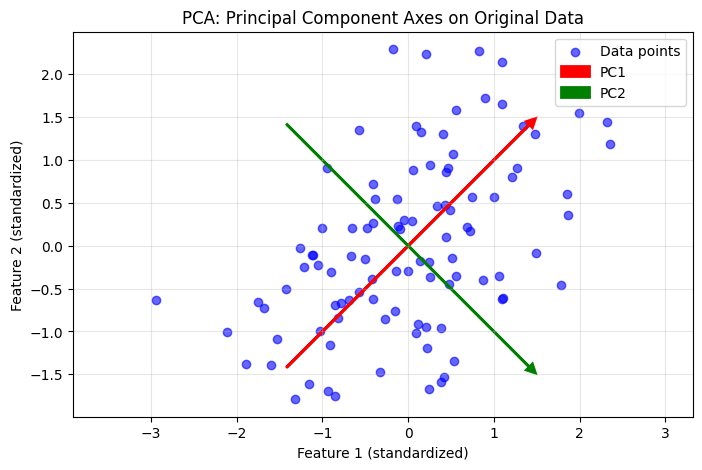

Explained variance ratio: [0.73994261 0.26005739]
Total explained variance: 1.0000


In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Generate random data (100, 2)
np.random.seed(42)
data = np.random.randn(100, 2)
data[:, 1] = data[:, 1] * 0.5 + data[:, 0] * 0.3  # Create some correlation

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data_scaled)

# Get PCA components (principal axes)
components = pca.components_

# Create the plot
plt.figure(figsize=(8, 5))

# Plot original data points
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.6, c='blue', label='Data points')

# Plot principal component axes
mean_point = np.mean(data_scaled, axis=0)
scale_factor = 2.0

# First principal component (PC1)
pc1_start = mean_point - scale_factor * components[0]
pc1_end = mean_point + scale_factor * components[0]
plt.arrow(pc1_start[0], pc1_start[1], 
          2 * scale_factor * components[0][0], 2 * scale_factor * components[0][1],
          head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2, label='PC1')

# Second principal component (PC2)
pc2_start = mean_point - scale_factor * components[1]
pc2_end = mean_point + scale_factor * components[1]
plt.arrow(pc2_start[0], pc2_start[1], 
          2 * scale_factor * components[1][0], 2 * scale_factor * components[1][1],
          head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2, label='PC2')

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('PCA: Principal Component Axes on Original Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

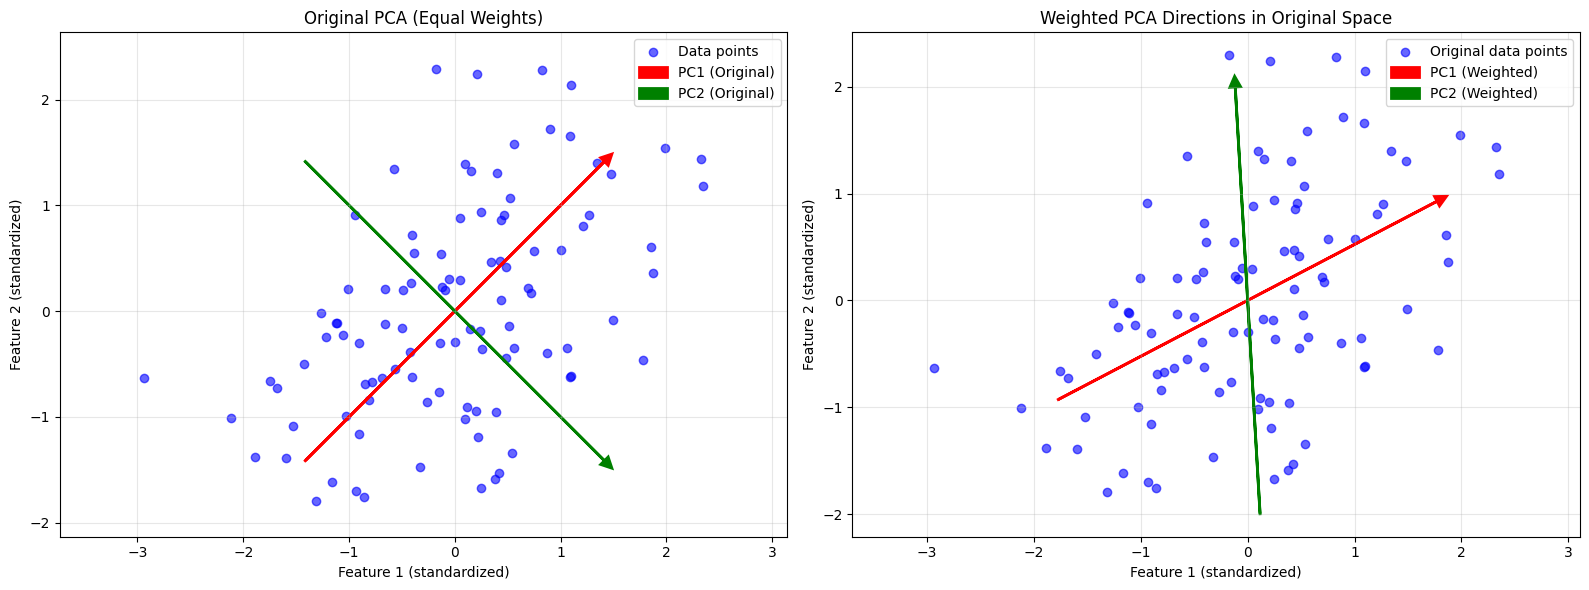

=== Comparison of PC Directions ===
Original PCA:
  PC1 direction: [0.707, 0.707]
  PC2 direction: [0.707, -0.707]
  Explained variance ratio: [0.73994261 0.26005739]

Weighted PCA (weights: [3. 1.]):
  PC1 direction in weighted space: [0.985, 0.172]
  PC2 direction in weighted space: [-0.172, 0.985]
  PC1 direction in original space: [0.886, 0.464]
  PC2 direction in original space: [-0.058, 0.998]
  Explained variance ratio: [0.92511891 0.07488109]

=== Angular Changes Due to Weighting ===
PC1 rotated by: 17.37 degrees
PC2 rotated by: 138.33 degrees


In [15]:
# Weighted PCA Implementation
# Apply weights to features before PCA to see how it affects PC directions

# Define weights
weights = np.array([3, 1.0])  # Feature 1: weight 1.2, Feature 2: weight 1.0

# Apply weights to the standardized data
data_weighted = data_scaled * weights

# Perform PCA on weighted data
pca_weighted = PCA(n_components=2)
pca_weighted.fit(data_weighted)

# Get weighted PCA components
components_weighted = pca_weighted.components_

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Original PCA
ax1.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.6, c='blue', label='Data points')

# Original PC axes
mean_point = np.mean(data_scaled, axis=0)
scale_factor = 2.0

# PC1 original
pc1_start = mean_point - scale_factor * components[0]
ax1.arrow(pc1_start[0], pc1_start[1], 
          2 * scale_factor * components[0][0], 2 * scale_factor * components[0][1],
          head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2, label='PC1 (Original)')

# PC2 original
pc2_start = mean_point - scale_factor * components[1]
ax1.arrow(pc2_start[0], pc2_start[1], 
          2 * scale_factor * components[1][0], 2 * scale_factor * components[1][1],
          head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2, label='PC2 (Original)')

ax1.set_xlabel('Feature 1 (standardized)')
ax1.set_ylabel('Feature 2 (standardized)')
ax1.set_title('Original PCA (Equal Weights)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# Right plot: Weighted PCA in original observation space
ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.6, c='blue', label='Original data points')

# Transform weighted PC components back to original coordinate system
# The weighted PCA was computed on weighted data, so we need to scale back by weights
components_weighted_original = components_weighted / weights
# Normalize to unit vectors for proper visualization
components_weighted_original = components_weighted_original / np.linalg.norm(components_weighted_original, axis=1, keepdims=True)

# PC1 weighted (in original space)
pc1_weighted_start = mean_point - scale_factor * components_weighted_original[0]
ax2.arrow(pc1_weighted_start[0], pc1_weighted_start[1], 
          2 * scale_factor * components_weighted_original[0][0], 2 * scale_factor * components_weighted_original[0][1],
          head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2, label='PC1 (Weighted)')

# PC2 weighted (in original space)
pc2_weighted_start = mean_point - scale_factor * components_weighted_original[1]
ax2.arrow(pc2_weighted_start[0], pc2_weighted_start[1], 
          2 * scale_factor * components_weighted_original[1][0], 2 * scale_factor * components_weighted_original[1][1],
          head_width=0.1, head_length=0.1, fc='green', ec='green', linewidth=2, label='PC2 (Weighted)')

ax2.set_xlabel('Feature 1 (standardized)')
ax2.set_ylabel('Feature 2 (standardized)')
ax2.set_title('Weighted PCA Directions in Original Space')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axis('equal')

plt.tight_layout()
plt.show()

# Compare the PC directions
print("=== Comparison of PC Directions ===")
print(f"Original PCA:")
print(f"  PC1 direction: [{components[0][0]:.3f}, {components[0][1]:.3f}]")
print(f"  PC2 direction: [{components[1][0]:.3f}, {components[1][1]:.3f}]")
print(f"  Explained variance ratio: {pca.explained_variance_ratio_}")

print(f"\nWeighted PCA (weights: {weights}):")
print(f"  PC1 direction in weighted space: [{components_weighted[0][0]:.3f}, {components_weighted[0][1]:.3f}]")
print(f"  PC2 direction in weighted space: [{components_weighted[1][0]:.3f}, {components_weighted[1][1]:.3f}]")
print(f"  PC1 direction in original space: [{components_weighted_original[0][0]:.3f}, {components_weighted_original[0][1]:.3f}]")
print(f"  PC2 direction in original space: [{components_weighted_original[1][0]:.3f}, {components_weighted_original[1][1]:.3f}]")
print(f"  Explained variance ratio: {pca_weighted.explained_variance_ratio_}")

# Calculate angle change
def angle_between_vectors(v1, v2):
    """Calculate angle between two vectors in degrees"""
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    cos_angle = np.clip(cos_angle, -1.0, 1.0)  # Handle numerical errors
    return np.degrees(np.arccos(cos_angle))

pc1_angle_change = angle_between_vectors(components[0], components_weighted_original[0])
pc2_angle_change = angle_between_vectors(components[1], components_weighted_original[1])

print(f"\n=== Angular Changes Due to Weighting ===")
print(f"PC1 rotated by: {pc1_angle_change:.2f} degrees")
print(f"PC2 rotated by: {pc2_angle_change:.2f} degrees")